In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model


# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model 


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

Using TensorFlow backend.


# Artificial Neural Networks for Time Series Forecasting

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>Perceptrons</strong>, a linear classifier analogous to neurons in a biological brain. Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

Neurons may have state, generally represented by real numbers, typically between 0 and 1. Neurons and synapses may also have a weight that varies as learning proceeds, which can increase or decrease the strength of the signal that it sends downstream. Further, they may have a threshold such that only if the aggregate signal is below (or above) that level is the downstream signal sent. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>




https://www.youtube.com/watch?v=MVyauNNinC0

## Neural Network Basics

An ANN takes an input matrix $X$ applies a weights $W$ on the way through the network from input layer to the output layer to estimate some output $y$. This estimation process is knwon as <strong>Forward Propagation</strong>. The estimate $\hat{y}$ is compared to the actual observation $y$ using a <strong>Cost Function</strong> $E$ which computes the sum of squared errors. 

If the cost function is minimized for all weight parameters the neural network learns the most effective representation of the data $\hat{y}$ that leads the desired result $y$. That is, in every iteration the weights in the network are being adjusted in accordance to their contribution to the total error in the estimation. This process is called <strong> Back Propagation</strong>. Since $W$ is a vector


## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(y, X)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is assumed to be continuous this problem is called a supervised regression problem.

In [2]:
np.random.seed(7)

In [3]:
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values

# using keras often requires the data type float32
data = data.astype('float32')

# slice the data
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


The <code>create_data</code> function will be used to transform the time series into a regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time $t+1$.

In [6]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X_data, y_data = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X_data.append(a)
        y_data.append(data[row + lags, 0])
    return np.array(X_data), np.array(y_data)

In [7]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test     # due to naming convention

In [8]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [9]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.,  306.,  315.,  301.,  356.,  348.,
        355.,  422.,  465.,  467.,  404.,  347.,  305.,  336.,  340.,
        318.,  362.,  348.,  363.,  435.,  491.,  505.,  404.,  359.,  310.], dtype=float32)

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

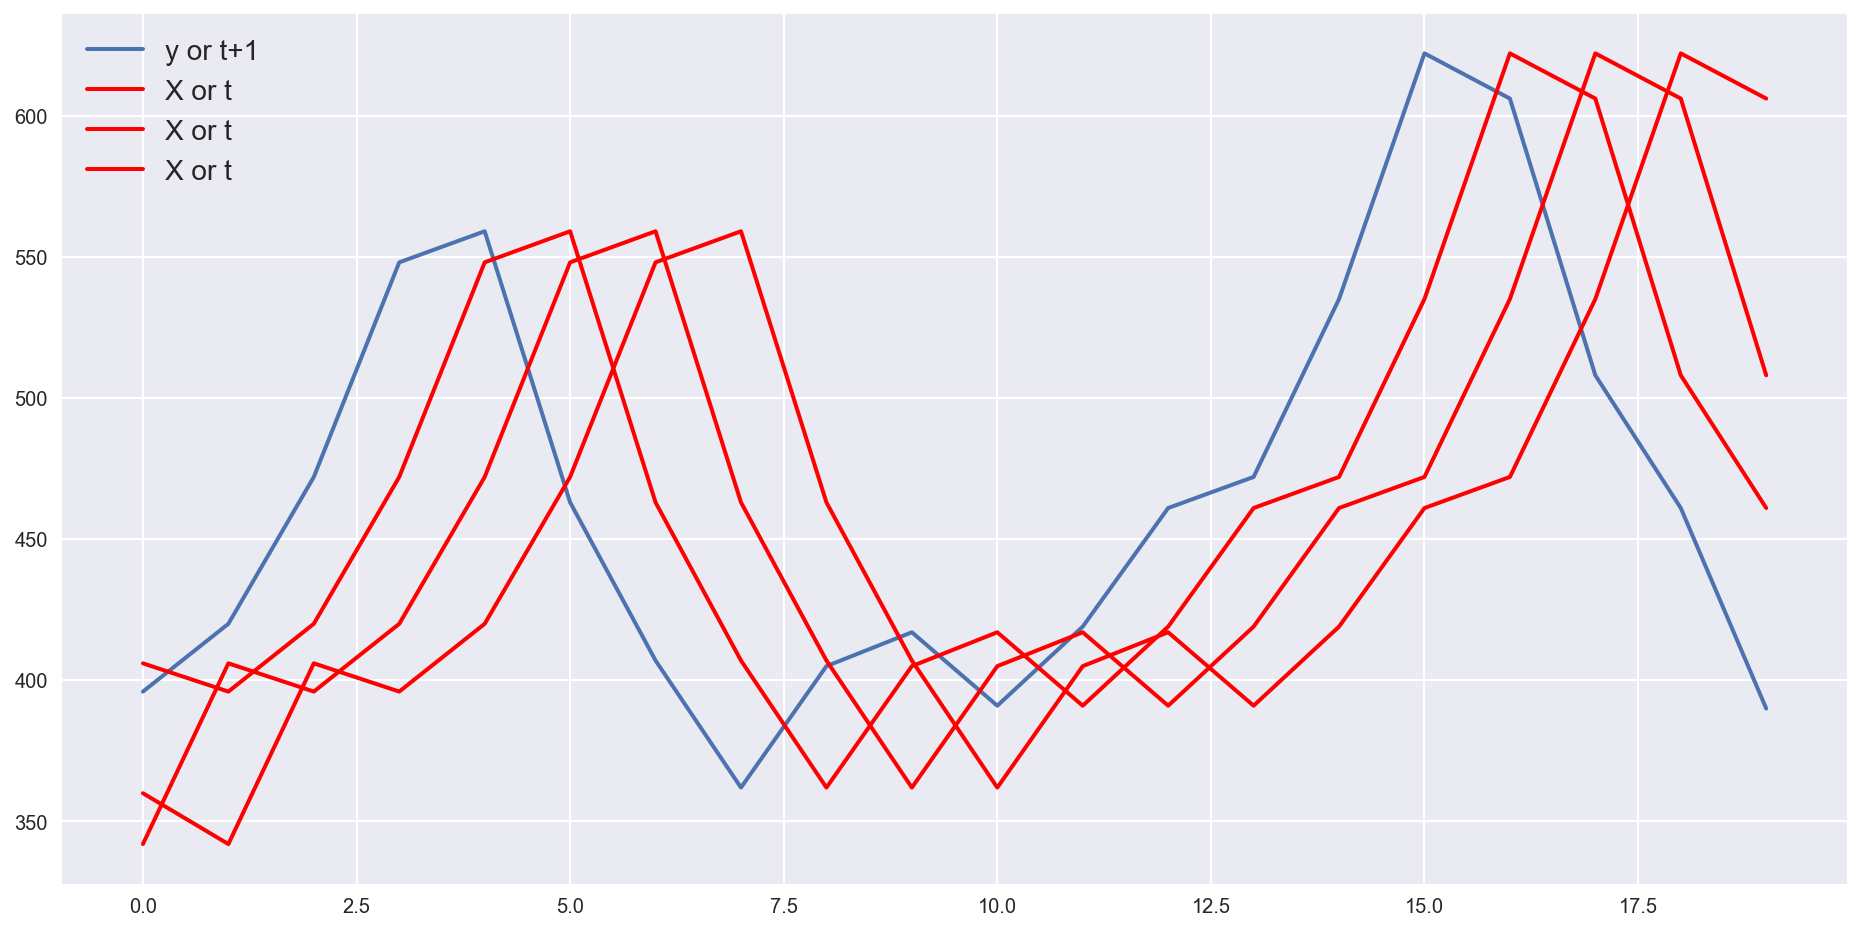

In [29]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t', color='red')
plt.legend(loc='best')
plt.show()

## Multilayer Perceptron Network

As previously, the data is sliced up into a <code>train</code> and <code>test</code> set to evaluate the performance of a two-year-ahead forecast.

The first simple network will have one input (size of the <code>lags</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

In [12]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 64463.9125
Epoch 2/200
0s - loss: 54675.3941
Epoch 3/200
0s - loss: 44603.7691
Epoch 4/200
0s - loss: 34442.3090
Epoch 5/200
0s - loss: 24862.5332
Epoch 6/200
0s - loss: 16615.7814
Epoch 7/200
0s - loss: 10189.5974
Epoch 8/200
0s - loss: 5838.0012
Epoch 9/200
0s - loss: 3185.8739
Epoch 10/200
0s - loss: 1821.3696
Epoch 11/200
0s - loss: 1201.4461
Epoch 12/200
0s - loss: 949.2978
Epoch 13/200
0s - loss: 861.4730
Epoch 14/200
0s - loss: 840.2322
Epoch 15/200
0s - loss: 829.5792
Epoch 16/200
0s - loss: 829.4166
Epoch 17/200
0s - loss: 829.8612
Epoch 18/200
0s - loss: 825.5639
Epoch 19/200
0s - loss: 826.1773
Epoch 20/200
0s - loss: 827.8875
Epoch 21/200
0s - loss: 831.7835
Epoch 22/200
0s - loss: 827.2402
Epoch 23/200
0s - loss: 826.7129
Epoch 24/200
0s - loss: 824.1512
Epoch 25/200
0s - loss: 825.6407
Epoch 26/200
0s - loss: 831.9016
Epoch 27/200
0s - loss: 824.5797
Epoch 28/200
0s - loss: 827.5414
Epoch 29/200
0s - loss: 830.5061
Epoch 30/200
0s - loss: 830.7234
E

In [13]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.13 MSE (28.57 RMSE)
Test Score: 2799.36 MSE (52.91 RMSE)


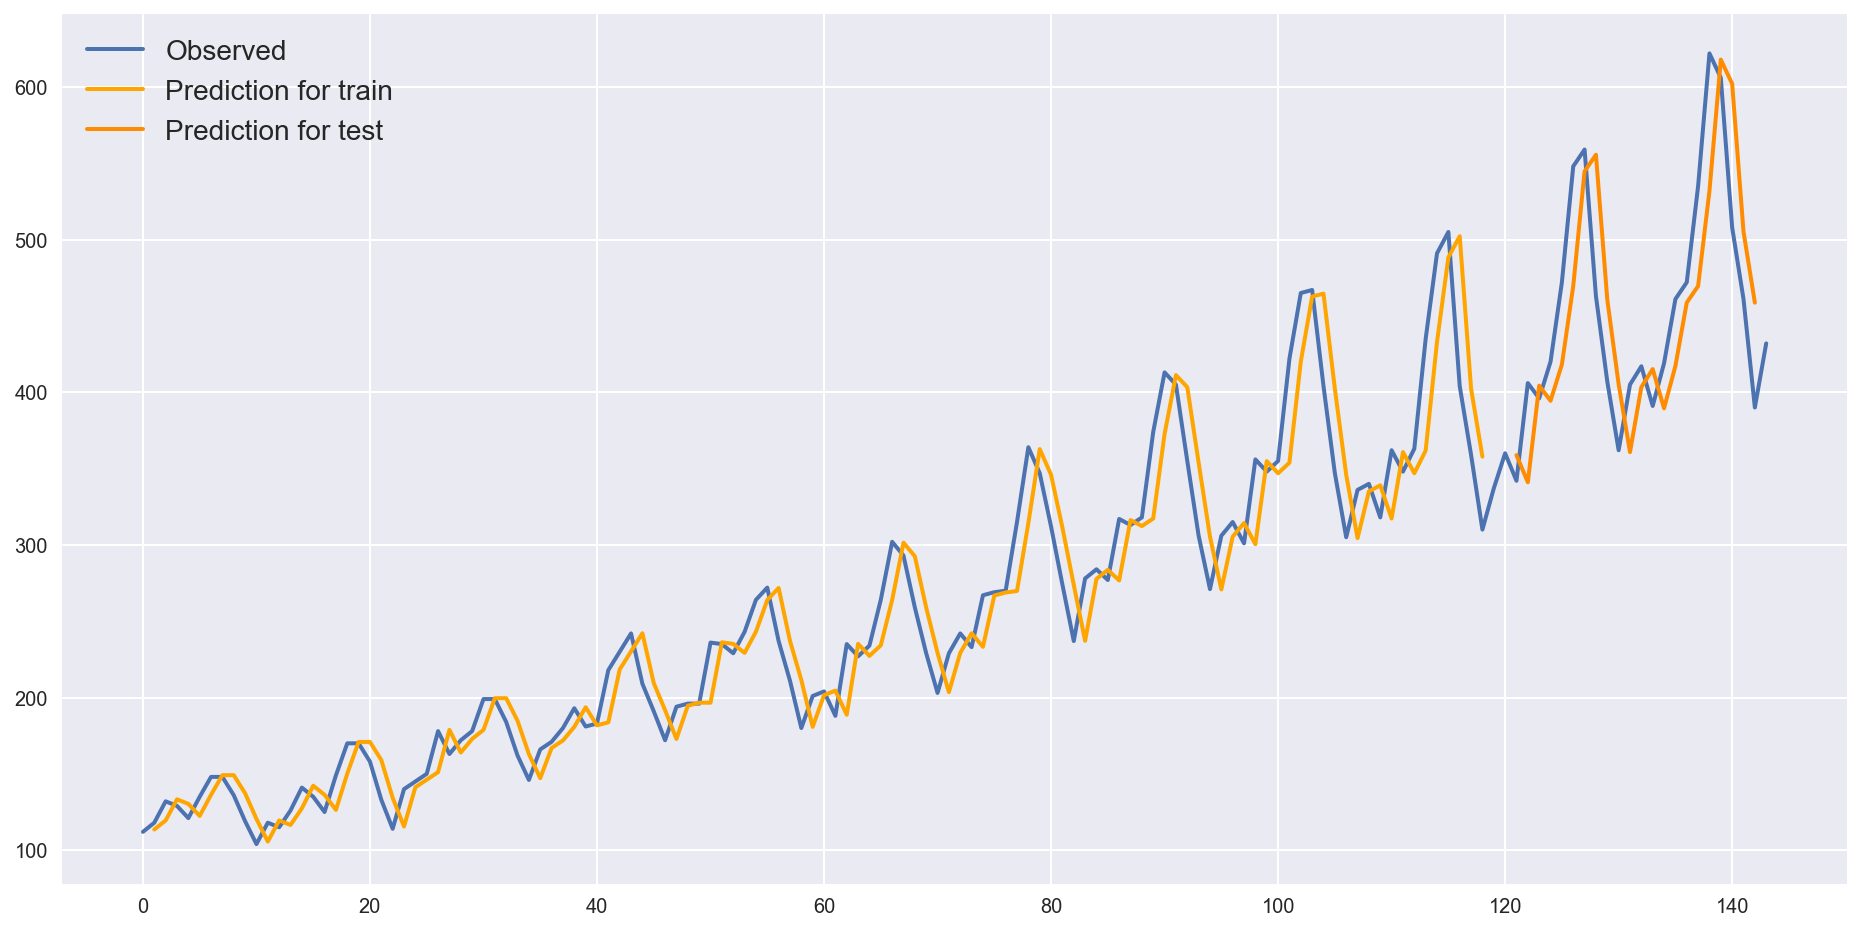

In [15]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [16]:
y_test

array([ 342.,  406.,  396.,  420.,  472.,  548.,  559.,  463.,  407.,
        362.,  405.,  417.,  391.,  419.,  461.,  472.,  535.,  622.,
        606.,  508.,  461.,  390.], dtype=float32)

In [17]:
test_predict

array([[ 358.8049 ],
       [ 341.00302],
       [ 404.29871],
       [ 394.40875],
       [ 418.14462],
       [ 469.57242],
       [ 544.73608],
       [ 555.61505],
       [ 460.67142],
       [ 405.28769],
       [ 360.7829 ],
       [ 403.30972],
       [ 415.17764],
       [ 389.46378],
       [ 417.15567],
       [ 458.69345],
       [ 469.57242],
       [ 531.87915],
       [ 617.92175],
       [ 602.09784],
       [ 505.17624],
       [ 458.69345]], dtype=float32)

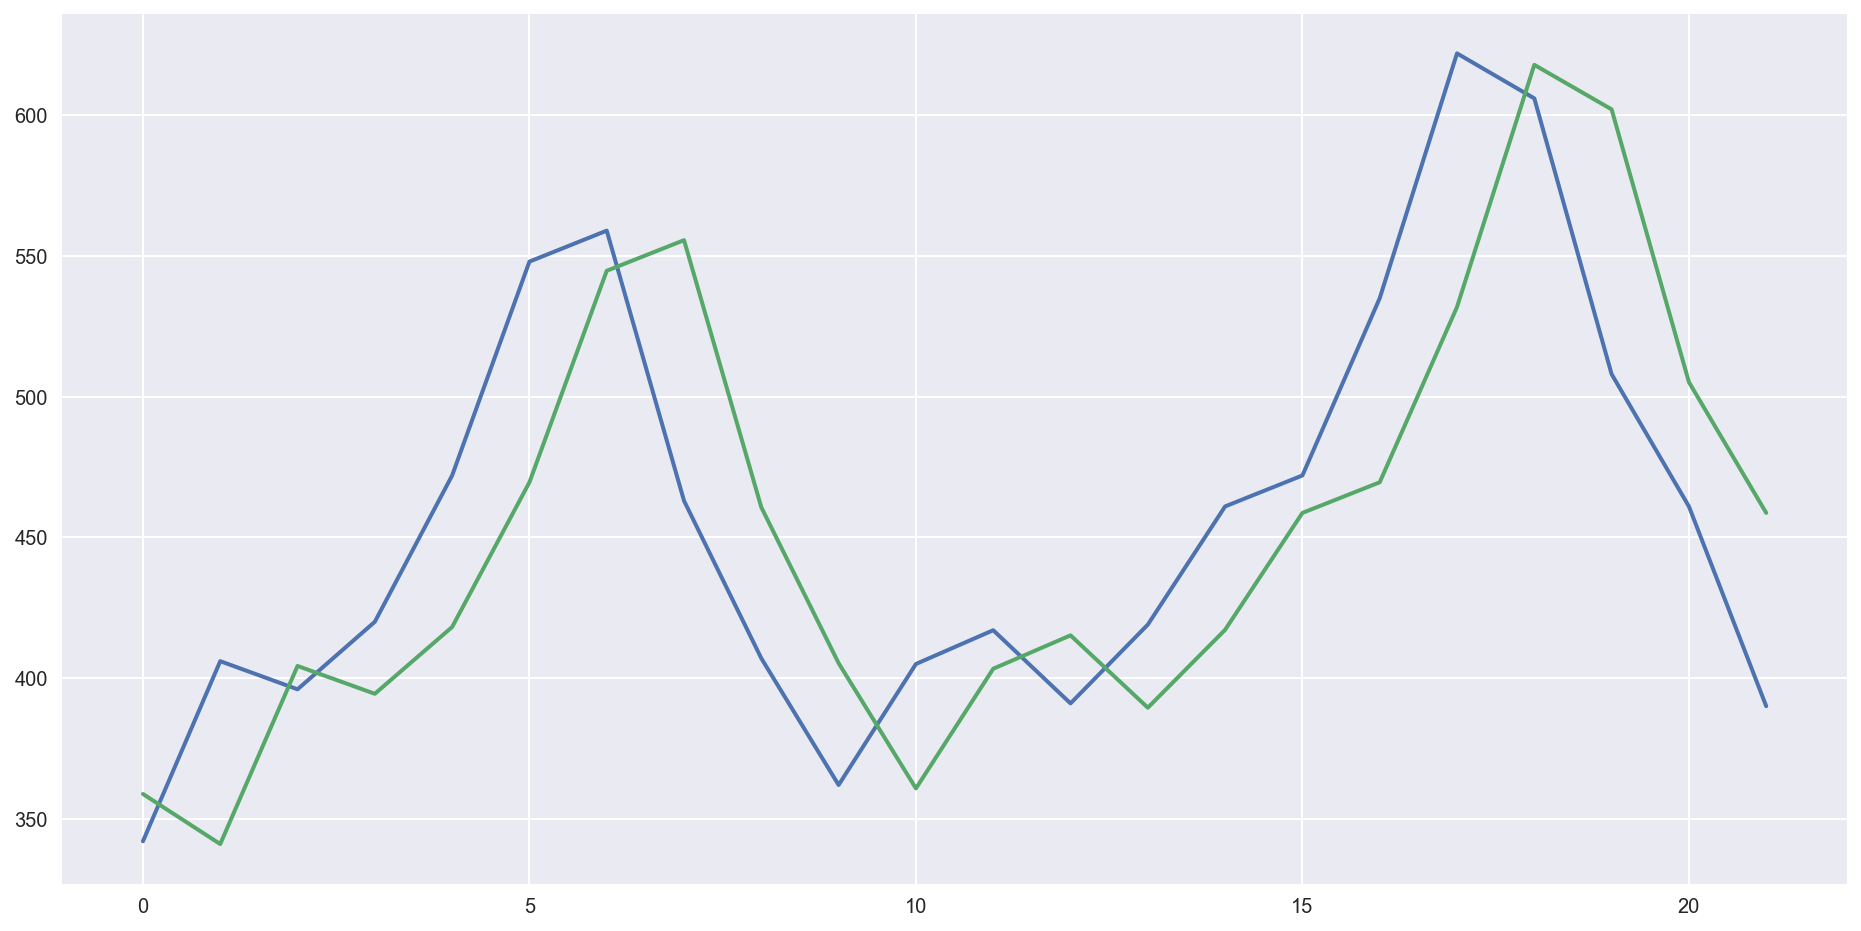

In [18]:
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [19]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11411.4
106.82392785560734


Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

In [20]:
# reshape dataset
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

In [ ]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t', color='red')
plt.legend(loc='best')
plt.show()

In [22]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
0s - loss: 3649.3679
Epoch 2/400
0s - loss: 1846.7512
Epoch 3/400
0s - loss: 1722.6019
Epoch 4/400
0s - loss: 1600.7178
Epoch 5/400
0s - loss: 1520.7217
Epoch 6/400
0s - loss: 1324.9347
Epoch 7/400
0s - loss: 1266.8847
Epoch 8/400
0s - loss: 1246.8595
Epoch 9/400
0s - loss: 1125.2774
Epoch 10/400
0s - loss: 1161.2170
Epoch 11/400
0s - loss: 1080.1541
Epoch 12/400
0s - loss: 1067.7350
Epoch 13/400
0s - loss: 983.5682
Epoch 14/400
0s - loss: 937.7093
Epoch 15/400
0s - loss: 904.3098
Epoch 16/400
0s - loss: 873.4356
Epoch 17/400
0s - loss: 870.5235
Epoch 18/400
0s - loss: 940.6042
Epoch 19/400
0s - loss: 892.3687
Epoch 20/400
0s - loss: 826.7302
Epoch 21/400
0s - loss: 771.7529
Epoch 22/400
0s - loss: 855.4792
Epoch 23/400
0s - loss: 813.6014
Epoch 24/400
0s - loss: 811.6598
Epoch 25/400
0s - loss: 780.8405
Epoch 26/400
0s - loss: 770.8219
Epoch 27/400
0s - loss: 809.5492
Epoch 28/400
0s - loss: 756.4455
Epoch 29/400
0s - loss: 798.0893
Epoch 30/400
0s - loss: 770.4423
Epoch 3

0s - loss: 741.1177
Epoch 247/400
0s - loss: 779.6180
Epoch 248/400
0s - loss: 820.1469
Epoch 249/400
0s - loss: 783.5146
Epoch 250/400
0s - loss: 728.6685
Epoch 251/400
0s - loss: 770.0724
Epoch 252/400
0s - loss: 753.3350
Epoch 253/400
0s - loss: 767.3725
Epoch 254/400
0s - loss: 707.5066
Epoch 255/400
0s - loss: 859.8454
Epoch 256/400
0s - loss: 760.4881
Epoch 257/400
0s - loss: 749.6774
Epoch 258/400
0s - loss: 739.1950
Epoch 259/400
0s - loss: 767.6801
Epoch 260/400
0s - loss: 772.6608
Epoch 261/400
0s - loss: 762.8829
Epoch 262/400
0s - loss: 731.0629
Epoch 263/400
0s - loss: 800.5249
Epoch 264/400
0s - loss: 740.1211
Epoch 265/400
0s - loss: 800.0072
Epoch 266/400
0s - loss: 724.2290
Epoch 267/400
0s - loss: 762.5067
Epoch 268/400
0s - loss: 743.7878
Epoch 269/400
0s - loss: 735.7905
Epoch 270/400
0s - loss: 751.0565
Epoch 271/400
0s - loss: 767.1826
Epoch 272/400
0s - loss: 733.1396
Epoch 273/400
0s - loss: 769.2980
Epoch 274/400
0s - loss: 777.5326
Epoch 275/400
0s - loss: 786

In [23]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 699.98 MSE (26.46 RMSE)
Test Score: 2197.99 MSE (46.88 RMSE)


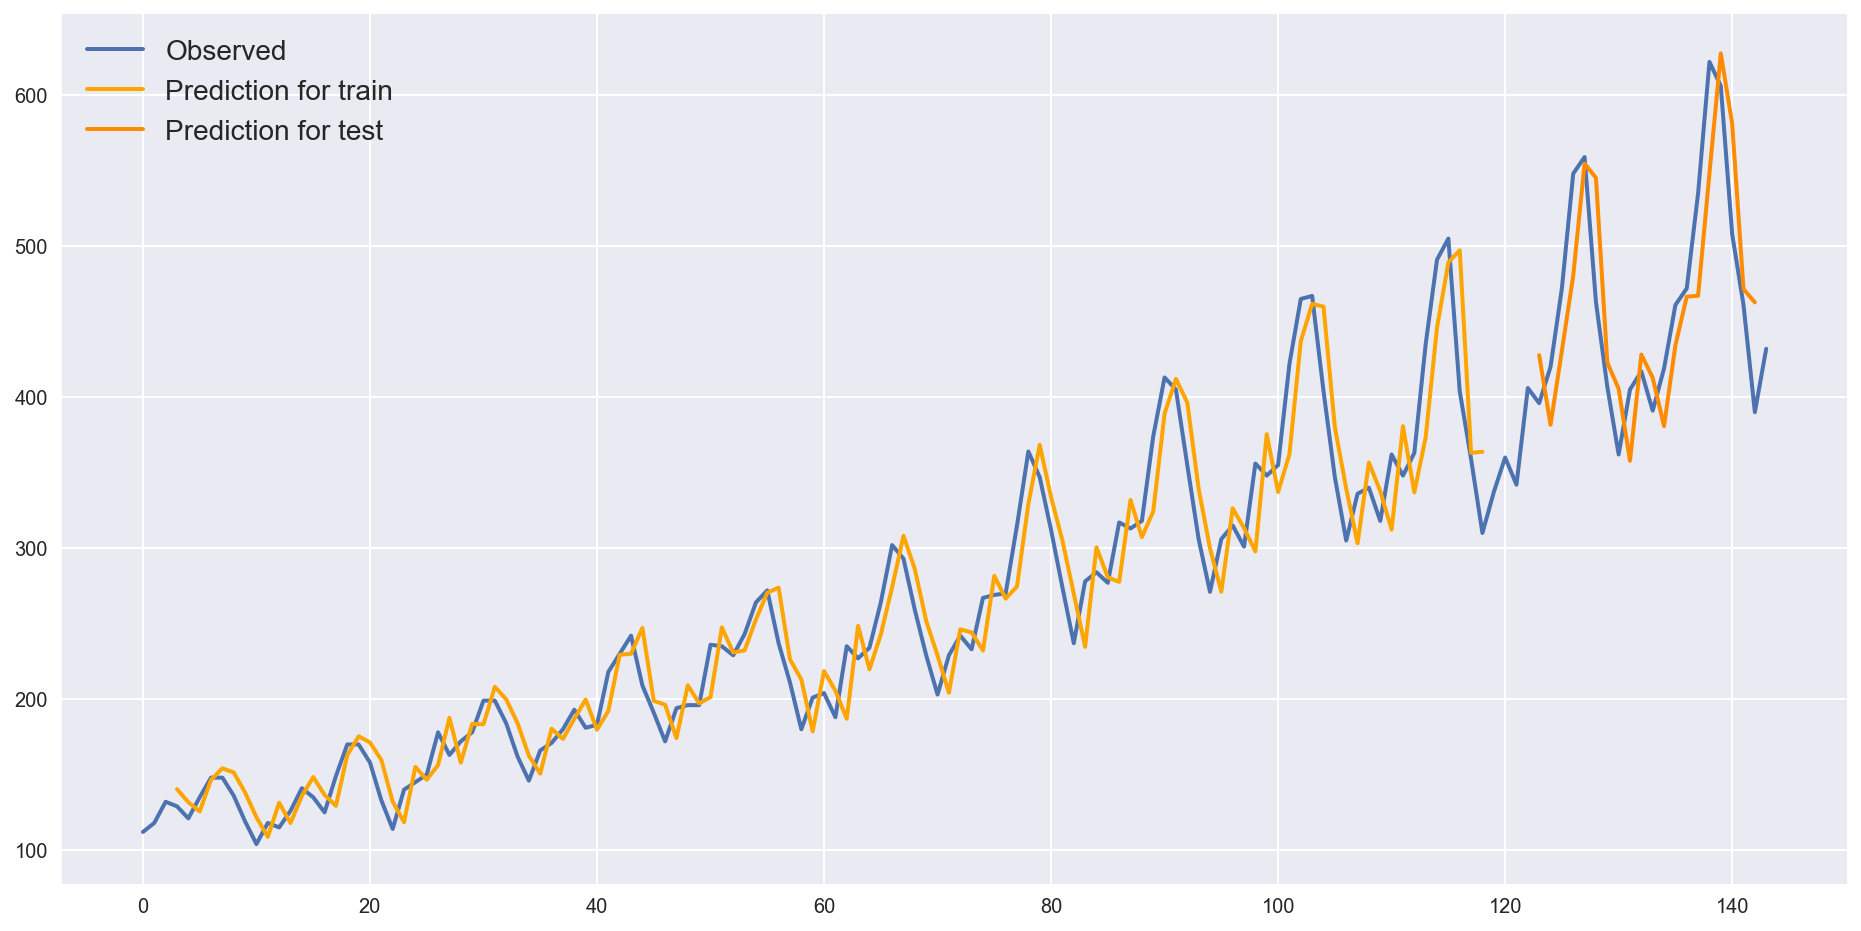

In [24]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [25]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

10354.4
101.75660777837723


In [26]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

In [27]:
test_predict

array([[ 427.74197],
       [ 381.70892],
       [ 430.66333],
       [ 480.552  ],
       [ 554.60376],
       [ 545.22888],
       [ 422.92517],
       [ 405.47107],
       [ 357.83768],
       [ 428.185  ],
       [ 412.83096],
       [ 380.76367],
       [ 434.25089],
       [ 466.50867],
       [ 467.13263],
       [ 548.22266],
       [ 627.6319 ],
       [ 581.17035],
       [ 471.50079],
       [ 462.72528]], dtype=float32)

# A Different approach

Change prespective to the monthly percentage changes in airline passengers

In [40]:
data = pd.read_csv('./data/passengers.csv', sep=';', header=0, parse_dates=True, index_col=0)

In [41]:
# compute monthly percentage chagnes
data['changes'] = np.log(data / data.shift(1))

In [42]:
data.head()

,n_passengers,changes
month,,
1949-01-01,112,nan
1949-02-01,118,0.05219
1949-03-01,132,0.11212
1949-04-01,129,-0.02299
1949-05-01,121,-0.06402


In [43]:
def create_data_set(data, lags=1):
    """
    For given df transform into lagged dataset
    """
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_%d' % lag
        data[col] = data['changes'].shift(lag)
        cols.append(col)
        
    return data, cols

In [44]:
# define lags
lags=3

# create new data
data, cols = create_data_set(data, lags=lags)

In [45]:
data.head(10)

,n_passengers,changes,lag_1,lag_2,lag_3
month,,,,,
1949-01-01,112,nan,nan,nan,nan
1949-02-01,118,0.05219,nan,nan,nan
1949-03-01,132,0.11212,0.05219,nan,nan
1949-04-01,129,-0.02299,0.11212,0.05219,nan
1949-05-01,121,-0.06402,-0.02299,0.11212,0.05219
1949-06-01,135,0.10948,-0.06402,-0.02299,0.11212
1949-07-01,148,0.09194,0.10948,-0.06402,-0.02299
1949-08-01,148,0.00000,0.09194,0.10948,-0.06402
1949-09-01,136,-0.08456,0.00000,0.09194,0.10948


In [46]:
data.dropna(inplace=True)

In [47]:
data.head()

,n_passengers,changes,lag_1,lag_2,lag_3
month,,,,,
1949-05-01,121,-0.06402,-0.02299,0.11212,0.05219
1949-06-01,135,0.10948,-0.06402,-0.02299,0.11212
1949-07-01,148,0.09194,0.10948,-0.06402,-0.02299
1949-08-01,148,0.00000,0.09194,0.10948,-0.06402
1949-09-01,136,-0.08456,0.00000,0.09194,0.10948


## OLS Regression

The the most known supervised learning alogorithm is <strong>ordinary least squares (OLS) regression</strong> method. OLS aims to  minimizing the sum of the squares of the differences between the observed responses (values of the variable being predicted) in the given dataset and those predicted by a linear function of a set of explanatory variables. - <a href="https://en.wikipedia.org/wiki/Ordinary_least_squares">Wikipedia</a>

The linear regression model

$$
y_i = \beta_1 + x_{i1} + \dots + \beta_p x_{ip} + \varepsilon_i
$$

can be vectorized

$$
y_i =  x_{i}^T \beta  + \varepsilon_i
$$

rearranged for the error

$$
\varepsilon_i = y_i -  x_{i}^T \beta
$$

squared

$$
\varepsilon_i^2 = \left( y_i -  x_{i}^T \beta \right)^2
$$

and summed over all $i = 1, \dots, n$

$$
\sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n \left( y_i -  x_{i}^T \beta \right)^2
$$

OLS regression can be performed using the <code>numpy</code> module

In [58]:
# return linear least-squares solution to linear matrix equation
# [0] - least square solution (betas)
# [1] = residuals
reg = np.linalg.lstsq(data[cols].values, np.sign(data['changes'].values))[0]

# display the beta coefficients
reg

In [60]:
# compute prediction
pred = np.sign(np.dot(data[cols].values, reg))

pred

array([-1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.])

# LSTM Recurrent Neural Network

In [4]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train = dataset[0:120, :]
test = dataset[120:, :]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0720
Epoch 2/100
0s - loss: 0.0345
Epoch 3/100
0s - loss: 0.0237
Epoch 4/100
0s - loss: 0.0207
Epoch 5/100
0s - loss: 0.0184
Epoch 6/100
0s - loss: 0.0161
Epoch 7/100
0s - loss: 0.0140
Epoch 8/100
0s - loss: 0.0118
Epoch 9/100
0s - loss: 0.0097
Epoch 10/100
0s - loss: 0.0080
Epoch 11/100
0s - loss: 0.0065
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0035
Epoch 16/100
0s - loss: 0.0034
Epoch 17/100
0s - loss: 0.0032
Epoch 18/100
0s - loss: 0.0032
Epoch 19/100
0s - loss: 0.0031
Epoch 20/100
0s - loss: 0.0032
Epoch 21/100
0s - loss: 0.0032
Epoch 22/100
0s - loss: 0.0032
Epoch 23/100
0s - loss: 0.0032
Epoch 24/100
0s - loss: 0.0031
Epoch 25/100
0s - loss: 0.0031
Epoch 26/100
0s - loss: 0.0032
Epoch 27/100
0s - loss: 0.0031
Epoch 28/100
0s - loss: 0.0032
Epoch 29/100
0s - loss: 0.0031
Epoch 30/100
0s - loss: 0.0032
Epoch 31/100
0s - loss: 0.0031
Epoch 32/100
0s - loss: 0.0031
Epoch 33/100
0s -

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [10]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [11]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.94 RMSE
Test Score: 51.98 RMSE


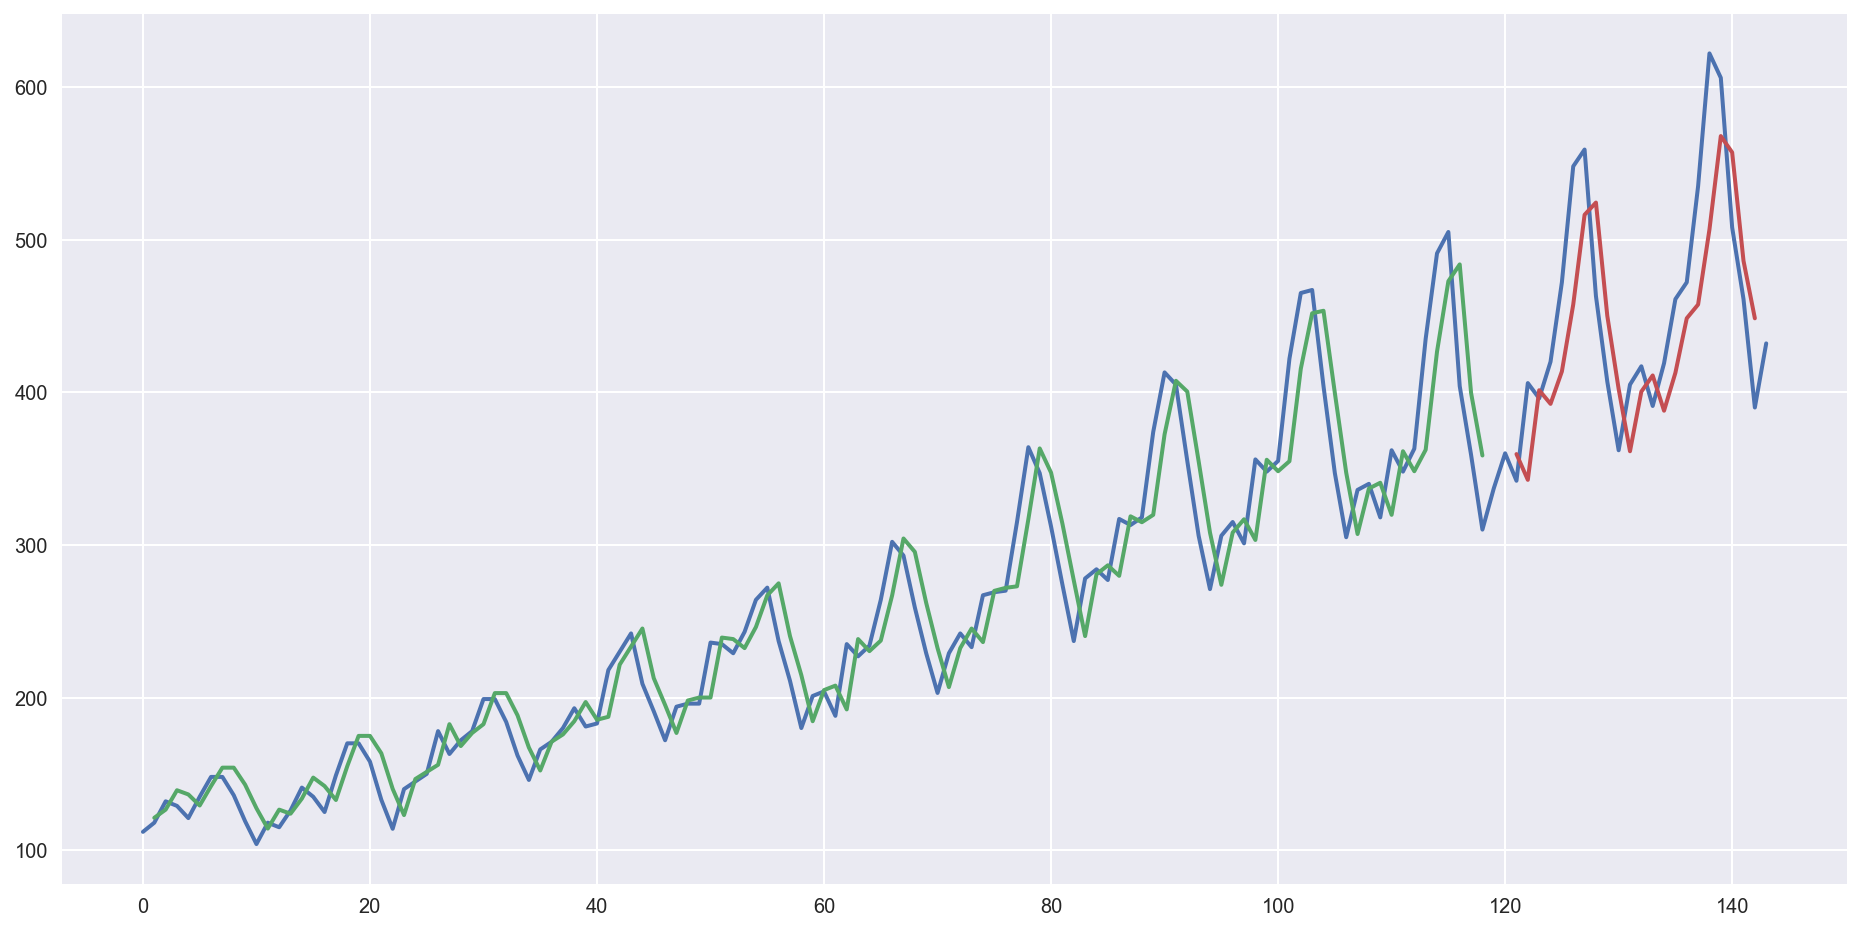

In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()